In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn import  linear_model

from sklearn.model_selection import train_test_split
from matplotlib import style
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston


In [3]:
Boston= load_boston()
Boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
Boston.data.shape

(506, 13)

In [6]:
# I convert the data into a Data Frame with pandas

In [7]:
data = pd.DataFrame(Boston.data)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# I add the headers that were lost

In [10]:
data.columns = Boston.feature_names

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
data["Price"]= Boston.target

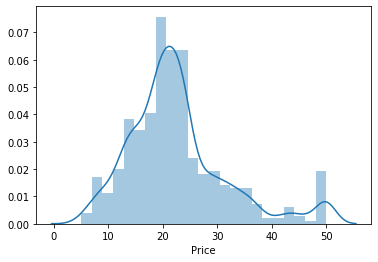

In [13]:
sns.distplot(data["Price"])

In [14]:
print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


In [15]:
data.isna().sum().sort_values()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

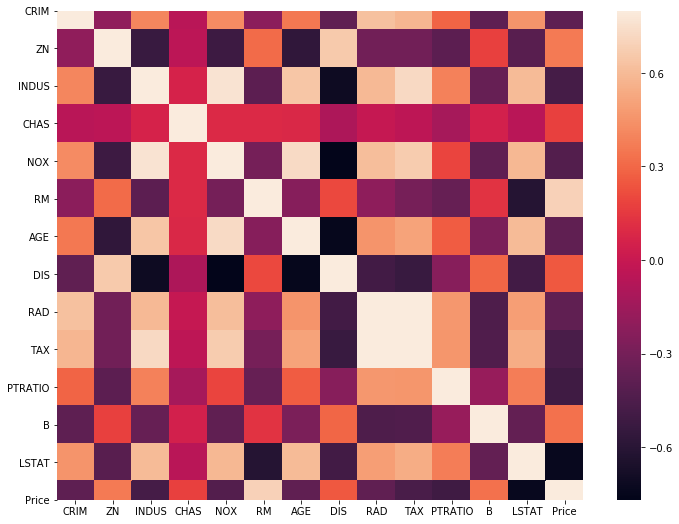

In [16]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

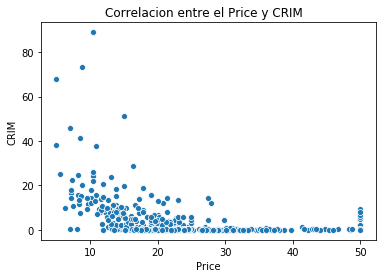

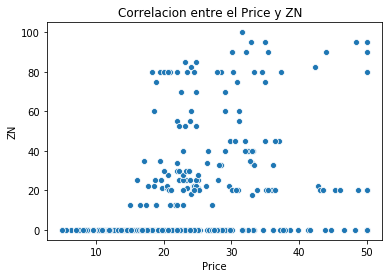

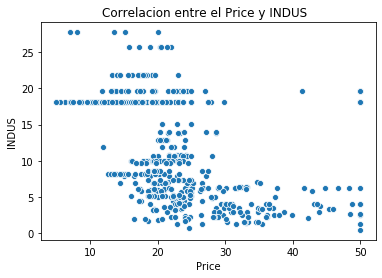

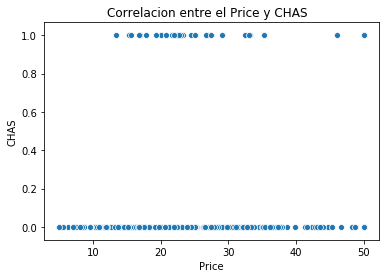

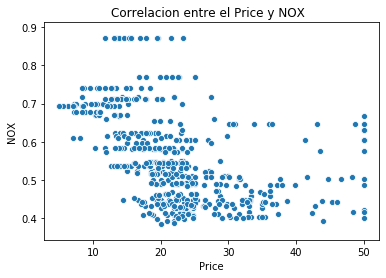

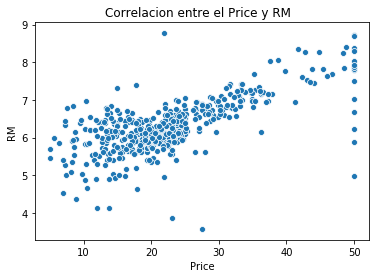

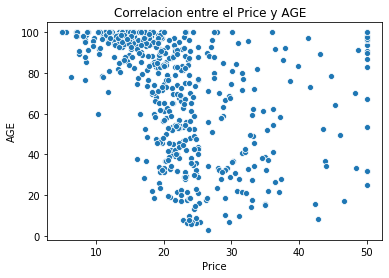

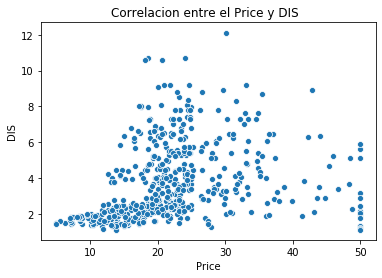

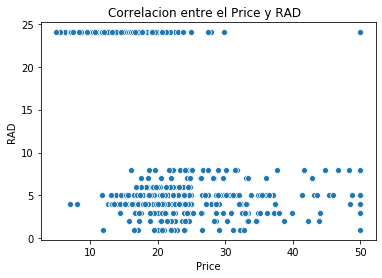

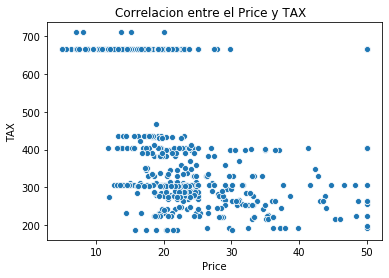

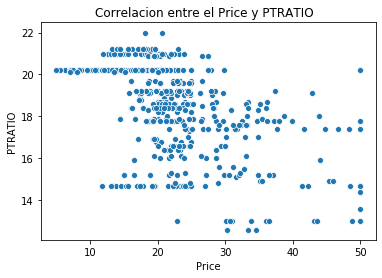

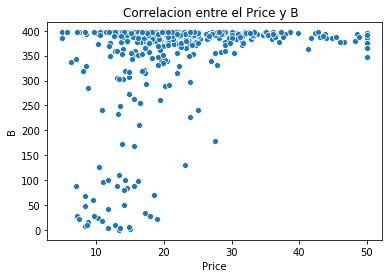

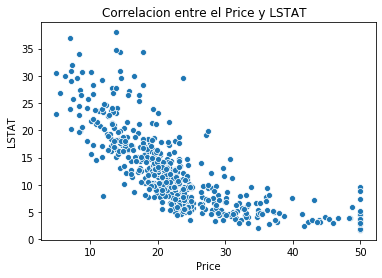

In [17]:
features=data.drop(columns="Price")
features = features.columns.values.tolist()

for columns  in features:
    temp = data[["Price",columns]]

    sns.scatterplot(x=temp["Price"],y =temp[columns]);
    plt.title("Correlacion entre el Price y {}  ".format(columns));
    temp.corr()
    plt.show()
    

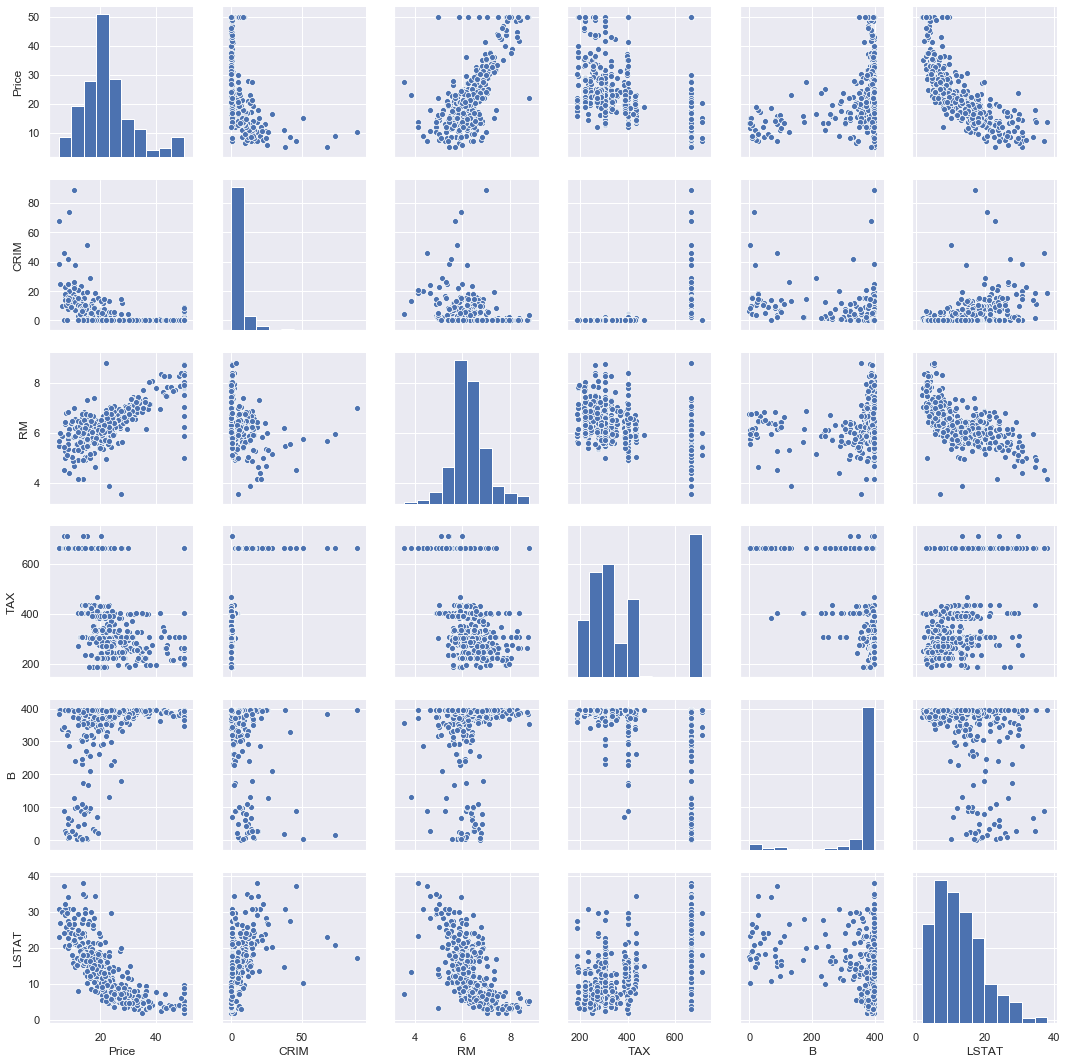

In [21]:
#scatterplot
sns.set()
cols = ['Price', 'CRIM', 'RM', 'TAX', 'B', 'LSTAT']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [22]:
final_features = data[cols]

In [23]:
final_features

,Price,CRIM,RM,TAX,B,LSTAT
0,24.0,0.00632,6.575,296.0,396.90,4.98
1,21.6,0.02731,6.421,242.0,396.90,9.14
2,34.7,0.02729,7.185,242.0,392.83,4.03
3,33.4,0.03237,6.998,222.0,394.63,2.94
4,36.2,0.06905,7.147,222.0,396.90,5.33
...,...,...,...,...,...,...
501,22.4,0.06263,6.593,273.0,391.99,9.67
502,20.6,0.04527,6.120,273.0,396.90,9.08
503,23.9,0.06076,6.976,273.0,396.90,5.64
504,22.0,0.10959,6.794,273.0,393.45,6.48


### Apliacion de Modelos 

In [79]:
X = np.array(data.drop(['Price' ,'PTRATIO','DIS','AGE' 
,'ZN','INDUS','CHAS'], 1))
X = preprocessing.scale(X)
y = np.array(data['Price'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)


In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)
confidence = lr.score(X_test, y_test)
print('Confianza = ', confidence)

Confianza =  0.6241884774321117


In [82]:
predict = lr.predict(X_test)
resta = np.mean(y_test - predict)
print('Error = ',resta)

Error =  0.6702238074202397


In [83]:
y_pred = lr.predict(X_test)

In [84]:
print('Valor de las pendientes o coeficientes "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

Valor de las pendientes o coeficientes "a":
[-0.95455442  0.53779154  3.5254385   1.53168741 -1.92437739  1.30104597
 -3.82885102]
Valor de la intersección o coeficiente "b":
22.331474271288783


In [93]:
print(X_test.shape)
print(y_test.shape)

(152, 7)
(152,)
